# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
#%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
import pandas as pd

bos = pd.read_csv('boston.csv')
print(bos.shape)
bos.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Downloading the file and parsing out the attribute information section for reference
housing_names_rawlink="https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names"

! curl -o "housing.names" $housing_names_rawlink

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2080  100  2080    0     0   8948      0 --:--:-- --:--:-- --:--:--  8965


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's rename the target variable of `MEDV` to `PRICE` which will contain the prices. 

In [4]:
bos = bos.rename(columns={"MEDV":"PRICE"})
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<hr>

<div class="alert alert-warning alert-dismissible fade show" style="color:magenta">
    
NOTE: The boston housing repo has a `housing.names` file that defines the acronyms used in the table columns, which I will read into this notebook for reference.

</div>

In [5]:
with open('housing.names','r') as f:
    lines = f.readlines()

a = [lines.index(l) for l in lines if l.startswith('7. Attribute Information:')][0]
b = [lines.index(l) for l in lines if l.startswith('8. Missing Attribute Values:')][0]

lines = lines[a+2:b-1]
for l in lines:
    print(l.strip())

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over
25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds
river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's


In [6]:
attr_descr = {}
for l in lines:
    words = [ w for w in l.strip().split(' ')[1:] if w ]
    attr = words[0]
    descr = " ".join(words[1:])
    attr_descr[attr] = descr

cols=['Attribute','Description']

attributes = attr_descr.keys()
descriptions = attr_descr.values()

adtbl = pd.DataFrame({cols[0]:attributes,cols[1]:descriptions}).set_index('Attribute')
adtbl

,Description
Attribute,
CRIM,per capita crime rate by town
ZN,proportion of residential land zoned for lots ...
sq.ft.,
INDUS,proportion of non-retail business acres per town
CHAS,Charles River dummy variable (= 1 if tract bounds
0,otherwise)
NOX,nitric oxides concentration (parts per 10 mill...
RM,average number of rooms per dwelling
AGE,proportion of owner-occupied units built prior...


In [7]:
print('{')
for k,v in attr_descr.items():
    print(f"\t'{k}':'{v}'")
print('}')

{
	'CRIM':'per capita crime rate by town'
	'ZN':'proportion of residential land zoned for lots over'
	'sq.ft.':''
	'INDUS':'proportion of non-retail business acres per town'
	'CHAS':'Charles River dummy variable (= 1 if tract bounds'
	'0':'otherwise)'
	'NOX':'nitric oxides concentration (parts per 10 million)'
	'RM':'average number of rooms per dwelling'
	'AGE':'proportion of owner-occupied units built prior to 1940'
	'DIS':'weighted distances to five Boston employment centres'
	'RAD':'index of accessibility to radial highways'
	'TAX':'full-value property-tax rate per $10,000'
	'PTRATIO':'pupil-teacher ratio by town'
	'B':'1000(Bk - 0.63)^2 where Bk is the proportion of blacks'
	'town':''
	'LSTAT':'% lower status of the population'
	'MEDV':'Median value of owner-occupied homes in $1000's'
}


In [8]:
attr_descr_concise = {
	'CRIM':'crime rate per capita',
	'ZN':'proportion of zoned residential land (area > 25K ft^2)',
	'INDUS':'proportion of non-retail business acres per town',
	'CHAS':'Charles River dummy variable (= 1 if tract bounds, 0 otherwise)',
	'NOX':'nitric oxides concentration [$10^{-7}$]',
	'RM':'mean rooms per dwelling',
	'AGE':'proportion of owner-occupied units built prior to 1940',
	'DIS':'weighted distances to five Boston employment centres',
	'RAD':'radial highways accessibility index',
	'TAX':'property-tax rate per $10,000',
	'PTRATIO':'pupil-teacher ratio',
	'B':'1000(Bk - 0.63)^2',
	'LSTAT':'% lower status of the population',
	'MEDV':'Median value of owner-occupied homes in $1000s',
    'PRICE':'Housing Price'
}

## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

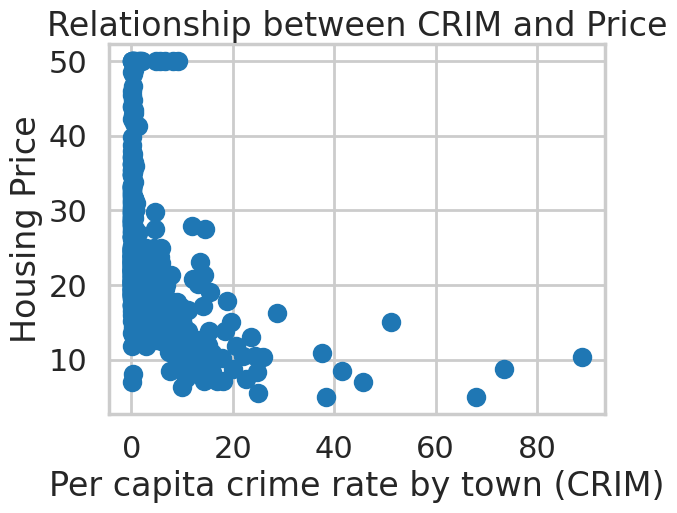

In [10]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [11]:
# your turn: describe relationship

<div style="color:#b68900"> 

#### Describing the CRIM-PRICE relationship

As one might expect of the impact of crime rates on housing prices, the relationship is **negative**.  Specifically, this negative relationship appears to be **non-linear**, with the rate of decrease in housing seemingly decaying as crime rate increases.  That said, there is a slightly broader range of crimes rates in the narrow upper extremes of price (50) compared to the upper-middle range (30-40) of prices.  This forms a short horizontal line at the top left which sharply stands out from the overall trend, which otherwise roughly resembles that of *exponential decay*.  However, while this is visually anomalous from the perspective of such a trend, none of the data points in this "short horizontal line" are technically distant from the rest of the data points in terms of both price and crime rate.  Considering this, the abscence of any other readily apparent anomalies, along with the fact that the scatterplot itself does not specify any thresholds (e.g., based on interquartile ranges), it is difficult to say very much about **outliers** at this point.

</div>

<div style="color:#b68900"> 

#### Scatterplots of other independent variables and PRICE.

</div>

<div style="color:#b68900"> 

I went ahead and defined a function `bos_scat`, since this will be done multiple times using the same dataframe and target variable for multiple independent variables:
</div>

In [12]:
def bos_scat(x:str,y:str='PRICE',xlabel='',ylabel='',color=None):
    '''
    Constructs scatterplot between specified columns of the boston housing dataframe.

    PARAMETERS
        x : column name of the independent/explanatory variable.  Not case-sensitive - i.e., will be automatically converted to uppercase to match dataframe format. 
        y : column name of the dependent/target/response variable (default = 'PRICE')
        xlabel : as per matplotlib.pyplot; default is based on attr_descr_concise (see DEPENDENCIES)
        ylabel : as per matplotlib.pyplot; default is based on attr_descr_concise (see DEPENDENCIES)
        color : as per matplotlib.pyplot; default is None (i.e., matplotlib.pyplot default)

    DEPENDENCIES
        matplotlib.pyplot
        attr_descr_concise : dictionary mapping column names (which are abbreviations) to the actual attribute (what the abbreviation stands for).
            This is used for default axes labels if not specified in kwarg.
    '''
    
    plt.cla(); plt.clf()
    x = x.upper(); y = y.upper()

    if not xlabel:
        xl = attr_descr_concise[x].title()
    if not ylabel:
        yl = attr_descr_concise[y].title()
        
    plt.scatter(bos[x], bos[y],color=color, marker='.', alpha=0.5)
    plt.xlabel(f"{xl} ({x})",fontsize=15)
    plt.ylabel(f"{yl} ({y})",fontsize=15)
    plt.title(f"Relationship between {x} and {y}")
    plt.show()

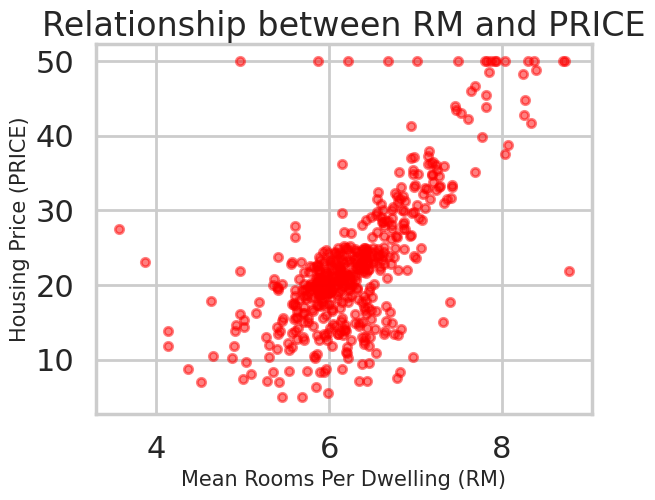

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
bos_scat('rm',color='red')

<div style="color:#b68900"> 

##### Describing the RM-PRICE relationship

In this case, there is roughly a **positive** and arguably **linear** relationship between average number of rooms per dwelling and housing price.  However, there appears to be a progressive narrowing of the variability in along both axes when moving from the bottom left to top right along the main trend.  

Interestingly, we again see a short horizontal line at the top, this time on the right side; in fact, it is almost as if the RM-PRICE plot, if converted to a logarithmic plot and then flipped along the diagonal (line from origin to top right), would look roughly the same as the CRIM-PRICE plot.  This might suggest a negative correlation between CRIM and RM, which maybe relevant for feature selection down the line.  

While again, no threshold has been explicitly defined yet to say very much regarding **outliers**.  There do appear to be some rare points on both extremes for RM (i.e., on the far left and right of the x-axis alone)&mdash; however, they do not appear significantly distant from the main cluster and could simply represent tails of a distribution that at least resembles a normal distribution (i.e., bell-curve shape with decent symmetry, but not necessarily mesokurtic).

</div>

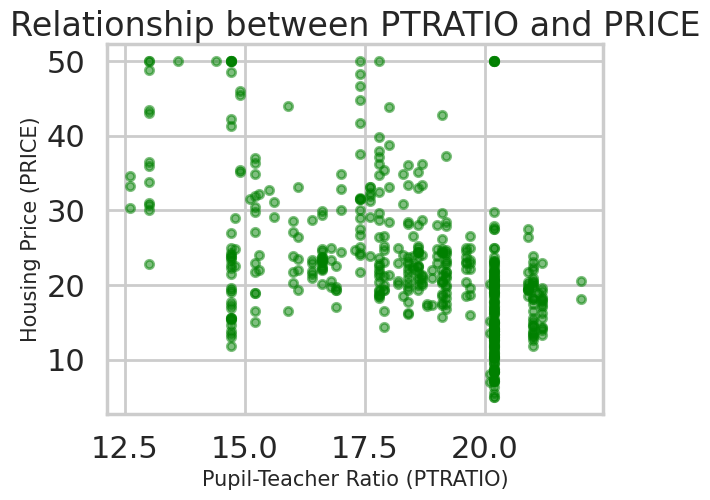

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
bos_scat('ptratio',color='green')

<div style="color:#b68900"> 

##### Describing the PTRATIO-PRICE relationship

The trend is less clear here, although there appears to be an overall **negative** relationship between student-teacher ratio and housing price.  It is hard to tell whether or not this is linear overall, and there are clearly some interesting visual features that stand out, including what appear to be vertical streaks of high point density scattered across the horizontal axis, but particularly to the right side.  This perhaps represents a sort of "binning-effect" potentially related to how PTRATIO data was collected/reported or to the nature of PTRATIO itself &mdash;e.g., those collecting data grouped the PTRATIO into discrete bins or the school system standardized the classroom sizes along discrete intervals (e.g., [5, 10, 15, 20, 25]; [5,10,20,50,100]) for the sake of simplicity when reporting.  Additionally, this vertical streaking pattern may also suggest an unplotted variable that affects both PRICE and PTRATIO&mdash; i.e., each vertical streak could represent a subsidiary dataset with fixed PTRATIO but a variable range of this unplotted variable, and such variation leads to variations in PRICE independent of PTRATIO (hence the vertical spread); if we knew the value of this variable for each data point, we could theoretical fix its value (e.g. to the average) get a clearer trend for PTRATIO-PRICE.

</div>

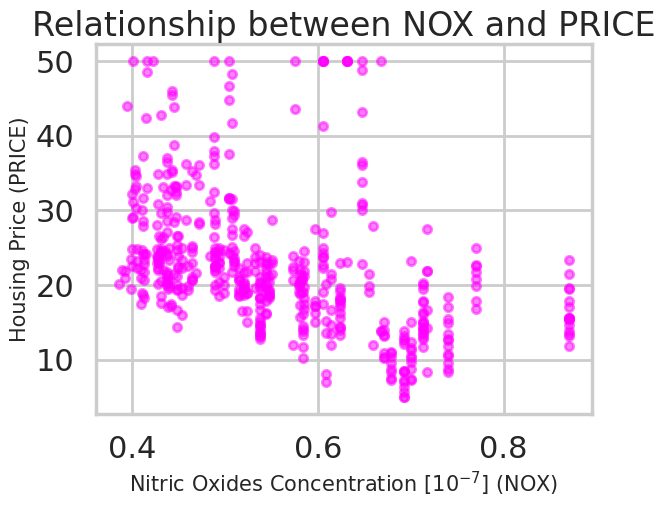

In [15]:
# your turn: create some other scatter plots
bos_scat('nox',color='magenta')

<div style="color:#b68900"> 

##### Interest in Concentration of Nitric Oxides (NOX)
I found this variable interesting as NOX has a quantitative analytic advantage since it is, in most practical situations, a continuous variable (since the "discreteness" of individual molecules are negligible at this scale); thus, as a possible predictor of PRICE, it may potentially provide more precision in theory.  However, this is contingent upon how strong the relationship is, and the maximum precision may be limited by the inherent discreteness of how monetary value is commonly represented (i.e., we typically don't deal with values between \\$0.00 and \\$0.01).   

##### Describing the NOX-PRICE Relationship

Similar to PTRATIO-PRICE, the trend appears to be **negative** overall, but the strength of the relationship is fairly weak and thus **linearity** is unclear.  There are also some vertical streaks, although it seems that they are slightly more dense to the left this time, if not evenly spread across the horizontal axis.  

The vertical streaks may be explained by some sort of binning process as described with PTRATIO-PRICE, although this seems less probable given the effectively continous nature of NOX, and I didn't see anything suggesting the values were binned for the sake of medical decision-making or public health communications (e.g., how Hgb-A1c values are grouped into normal, pre-diabetic, diabetic, etc.).  

On the other hand, one can imagine that varying degrees of effectiveness for public health campaigns may lead to varying levels of public awareness / concern regarading NOX in the home, which in turn could influence housing prices on top of the actual NOX level.  For example, the vertical streak to the far right represents a variety of housing prices roughly from 11 to 25&mdash;it could be that the houses with prices closer to 25 were selling more to those who were simply less aware/concerned about NOX, while those with lower prices (closer to 11) were mainly of interest to those who were more aware/concerned but, for example, could only afford these prices.  

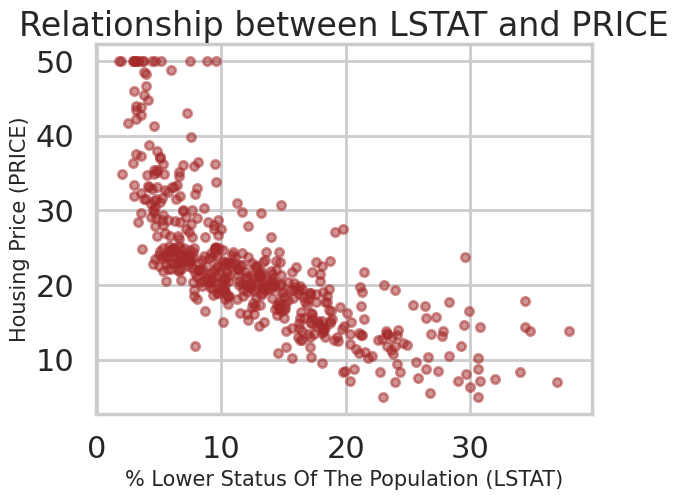

In [16]:
bos_scat('lstat',color='brown')

<div style="color:#b68900"> 

##### Interest in Percent Lower Status of Population (LSTAT)
I found this variable interesting, in part, due to the initial ambiguity with how  the `housing.names` file of the [UCI Boston Housing Dataset](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names) defined it:

    "13. LSTAT    % lower status of the population"

<br>

Upon further reading of [Harrison & Rubin (1978)](https://lawcat.berkeley.edu/record/1111234/files/fulltext.pdf) &mdash; cited as the data source in the UCI repo's accompanying [PDF document](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/UCI%20Machine%20Learning%20Repository_%20Housing%20Data%20Set.pdf)&mdash; the LSTAT is defined in more detail in Table IV as: 

    "Proportion of population that is lower status = ½
    (proportion of adults without some high school education and proportion of male workers classified as
    laborers). The logarithmic specification implies that
    socioeconomic status distinctions mean more in the
    upper brackets of society than in the lower classes."

<br>

As I mentioned earlier, some of the features of the NOX-PRICE plot might be partly influenced by socioeconomic status and education level, which may in turn affect the level of awareness and consideration for NOX when choosing one's housing.  The LSTAT variable appears to encompass much of this quite well, and thus will be interesting examine in relationship to PRICE and with the other independent variables.


##### Describing the LSTAT-PRICE relationship

There is clearly a **negative** relationship here, with a trend that appears **nonlinear** overall, but perhaps approximates linearity if only considering the lower half of housing prices.  Regardless, the decreasing slope with increasing LSTAT ("decreasing socioeconomic status") is quite in keeping with the last part of the definition for LSTAT, regarding how socioeconomic status distinctions mean more in the upper brackets as suggested by the "logarithmic specification."  

Of note, the observations are most densly clustered in roughly the bottom left corner of the plot.  In terms of the PRICE axis, this makes sense, as housing price falls into the category of "resources allocated on the basis of perceived or functional value", which often follow a Pareto distribution&mdash;broadly speaking, this means a minority of cases will be assoicated with a disproportionate amount of value and vice versa.  Meanwhile, one would think, by this logic, that a minority of the population will be associated with a disproportionate degree of socioeconomic status (SES) and education (Ed), and thus see more sparse data points on the left (low LSTAT = high SES/Ed) and denser clustering on the right (high LSTAT = low SES/Ed).  However, it seems along this axis, that the reverse may be true, but with overall less skew/magnitude of disproportion with a relatively denser cluster spread across the whole lower half of the LSTAT range, and moderately sparser points on in the upper half.  It is unclear what this implies, although I suspect this could represent a varioius nuances in sampling from Boston and in how LSTAT is defined:

* a majority of the "would-be" high LSTAT (low SES/Ed) population of the general region are in neighboring small towns / rural land, and therefore not technically in Boston, potentially related to the higher cost of living in Boston
* Boston, being the home to several prestigious universities and many high-paying industries, might understandably have a uniquely high proportion of education and socioeconomic status in its population compared to other cities; again, considering the high cost of living within a big city, it is more likely that those with of higher SES/Ed on average will be able to afford living here
* LSTAT is defined based on a threshold of high-school education and classification of specifically working men as "laborers"; depending on the data collection method, the true proportion of those without high-school education and working as "laborers" might be severely underrepresented due a combination of literacy/access limitations (in the case that it was a survey requiring transportation to a facility and/or means of communication less ubiquitous in the late 70s), lack of time away from their work / financial incentive to participate, lack of social/community and geographic proximity to academic centers and thus lack of awareness of such studies, etc.; additionally, the use of the "laborer" categorization may be semantically ambiguous while also narrow, potentially leaving out a significant proportion of alternative low-income scenarios one might not typically classify under "laborer". 

Nevertheless, the overall trend (both axes considered) has a very plausible story: high LSTAT (low SES/Ed) generally suggests lower financial means and thus lower likelihood of living in pricier homes. 

</div>

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<Axes: xlabel='RM', ylabel='PRICE'>

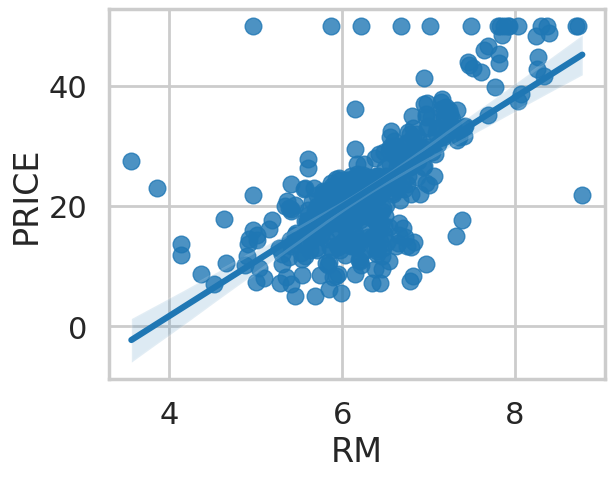

In [17]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


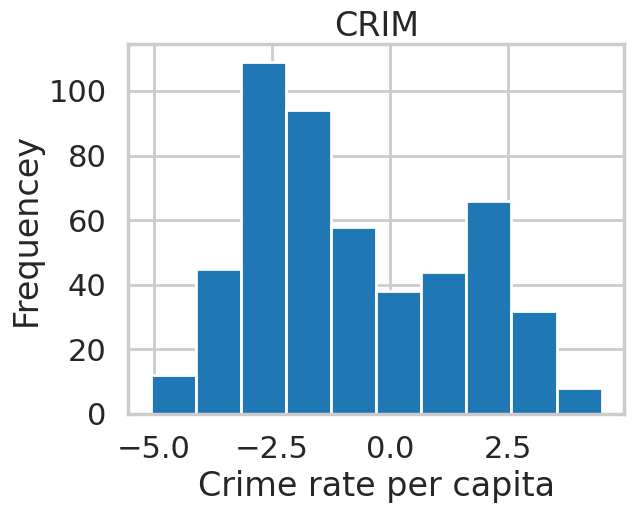

In [18]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

<div style="color:#b68900"> 
    
As we will be using the boston housing dataset again along with many other repeated `matplotlib` arguments throughout this notebook, I went ahead and created a function `bos_hist()`:

In [19]:
def bos_hist(x,df=bos,xlabel='x',logarithmic=False,color=None,show=True,alpha=1,meanline=False,gaussplot=False):
    
    """
    Plot a histogram of the data, with default dataframe `bos`. Optionally overlay a normal distribution curve with the same mean and std as the data, scaled to the length of the data.
    
    Parameters
    ----------
    x : array_like or str
        the data to plot, or a column name in the specified dataframe df (default = bos)
    df : pandas dataframe, optional
        the dataframe to use if x is a string and column name (default = bos)
    xlabel : str, optional
        the label for the x-axis (default = 'x')
    logarithmic : bool, optional
        if True, will convert data to logarithmic and update x-axis label (default = False)
    color : str, optional
        the color to use for the histogram (default = None)
    alpha : float, optional
        the transparency of the histogram (default = 1)
    meanline : bool, optional
        if True, will draw a dashed red line at the mean of the data (default = False)
    gaussplot : bool, optional
        if True, will overlay a normal distribution curve (default = False)
        
    Returns
    -------
    None

    
    Dependencies
    ------------
    numpy
    matplotlib
    pandas
    scipy
    attr_descr_concise : custom dict that maps column names to their descriptions / labels
    """

    # If 
    if hasattr(x,'__iter__') and type(x) != str:
        data = x
        xl = xlabel
        title = f"{xl} Distribution"
    elif type(x) == str and type(df) == pd.core.frame.DataFrame and x.upper() in df.columns:
        x = x.upper()
        data = bos[x]
        xl = attr_descr_concise[x].title()   
        title = f"{x} Distribution"
    else:
        print("ERROR: x is either a list/array with all x-values, or the column name of the specified dataframe df (default = bos)")
        return
        
    if logarithmic:
        data = np.log(data)
        xl = f"log of {xl}"
    bins = int(np.sqrt(len(data)))
    
    count,hbins,_ = plt.hist(data,bins=bins,color=color,label=x)

    if gaussplot:
        from scipy.stats import norm
        bin_width = hbins[1] - hbins[0]
        mugplot = np.mean(x)
        sgplot = np.std(x)
        xgplot = np.linspace(min(x),max(x),len(x))
        ygplot = norm.pdf(xgplot, mugplot, sgplot) * len(x) * bin_width
        crvlabel = f"N({r"$\mu$"}={mugplot:.2f}, {r"$\sigma^2$"}={sgplot**2:.2f})"
        crvcolor='green'
        lw = 2
        plt.plot(xgplot,ygplot,label=crvlabel,color=crvcolor,linewidth=lw)

    if meanline:
        plt.axvline(np.mean(x),label=f"{r"$\mu$"} = {mugplot:.02f}",color='red',linestyle='--')

    if show:
        plt.title(title)
        plt.ylabel("Frequency",fontsize=15)
        plt.xlabel(xl,fontsize=15)
        plt.show()   

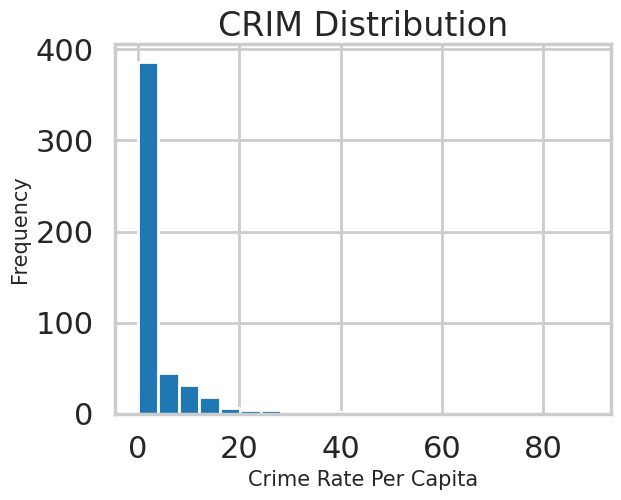

In [20]:
#your turn

# Plotting without taking the log (using logarithmic=False in my custom function)
bos_hist('crim',logarithmic=False)

<div style="color:#b68900"> 
    
Without taking the log, the data are more crammed together, and we miss subtle variations in the frequencies across various crime rates.  Of note, the logarithmic plot appears to have a <u>bimodal distribution</u>, which would not have been obvious here.

</div>

In [21]:
def bos_multi_hist(variables:list,title='',xl='',yl='Frequency',logbool=[],color_palette=sns.color_palette(),overlay=True):
    '''
    Plot multiple histograms from a list of column names (variables) the bos dataframe.
    
    PARAMETERS
    variables     : list of column names from the bos dataframe
    title,xl,yl   : title,xlabel,ylabel of plot (default 'Frequncy' for yl, '' for the others)
    logbool       : list of boolean values of same length (or single boolean values for all True/False)
    color_palette : iterable of color codes as accepted strings, hex codes, etc. for matplotlib
    overlay       : overlay or tandem display
    '''

    from math import isqrt
    
    nv = len(variables)
    
    # Parsing logbool argument
    if not logbool:
        logbool = [ False for k in range(nv) ]
    elif type(logbool) == bool:
        logbool = [ True for k in range(nv) ]
    elif type(logbool) != list or len(logbool) != len(variables):
        print("ERROR: For logbool, please pass in either (1) a boolean value, or (2) a list with the same length as b")
        return
    
    transparency = 1 / (nv + 1)

    if overlay:     
        for i in range(nv):
            x = variables[i]
            bos_hist(x,logarithmic=logbool[i],color=color_palette[i],show=False,alpha=transparency)
        plt.title(title)
        plt.xlabel(xl)
        plt.ylabel(yl)
        plt.legend()
    else:
        nr = isqrt(nv)
        if nr**2 == nv:
            nc = isqrt(nv)
        else:
            nc = isqrt(nv) + 1

        fig, ax = plt.subplots(nr,nc)
        axf = ax.flatten()
               
        for i in range(nv):
            v = variables[i].upper()
            data = bos[v]
            if logbool[i]:
                data = np.log(data)
                
            bins = int(np.sqrt(len(data)))
            
            axf[i].hist(data,color=color_palette[i],alpha=1)
            axf[i].set_title(f'{v}')
    
    plt.show()

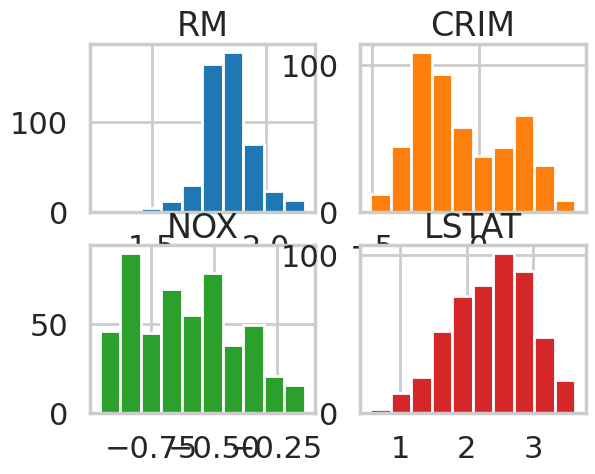

In [22]:
# Plotting histograms for PTRATIO, RM, NOX, and LSTAT
vbls = "rm crim nox lstat".upper().split(' ')
bos_multi_hist(vbls,logbool=True,overlay=False)

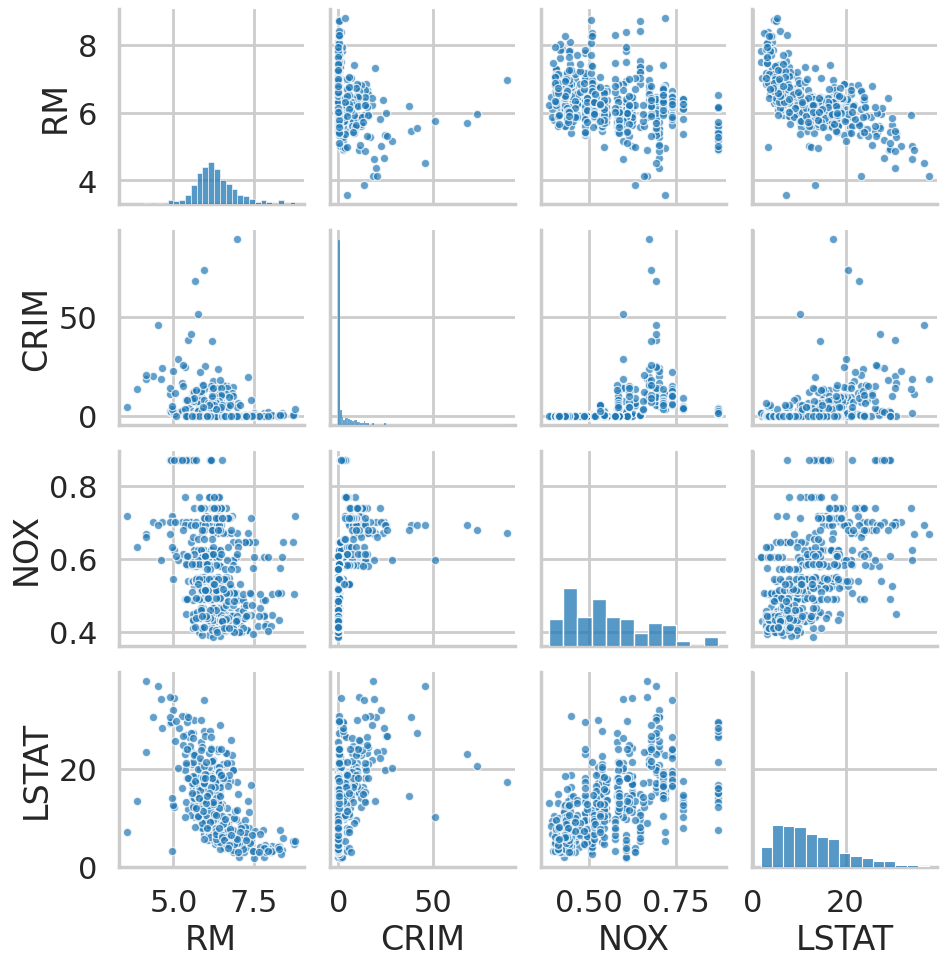

In [23]:
# Looking for correlations between the 4 predictors with a pairplot
vbls = "rm crim nox lstat".upper().split(' ')
sns.pairplot(data=bos,vars=vbls,markers='.',plot_kws={"alpha":0.7})

<div style="color:#b68900"> 

Some notable correlations in predictors:

* Negative, possibly inverse sigmoid/non-linear for LSTAT-RM
* Positive relationship for LSTAT-CRIM
* Positive relationship for LSTAT-NOX, as suspected in the earlier discussion
* Positive relationship for NOX-CRIM

* potentially a weak negative relationship NOX-RM, as increased RM may suggest increased space overall and thus any absolute quantity of nitric oxides could be diluted, resulting in slightly lower NOX (concentration). 
* potentially negative relation ship for CRIM-RM, but highly variable; this probably expected as there isn't really intuitive story for the number of rooms relating to crime rate, although one could consider indirectly that rooms correlate postively with socioeconomic status which in turn correlate negatively with crime rate; this may explain the slight negative trend, while levels of indirectness kind of lend it to a larger degree of variation due to confounding influences.

Of note, LSTAT-CRIM, CRIM-NOX, and NOX-LSTAT form a sort of triangle of correlation, suggesting multicolinearity, and potential for one of these features being able to represent for the other two as a predictor of PRICE.

</div>

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [24]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           2.49e-74
Time:                        13:42:31   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0.5, 1.0, 'Housing Price (statsmodels)')

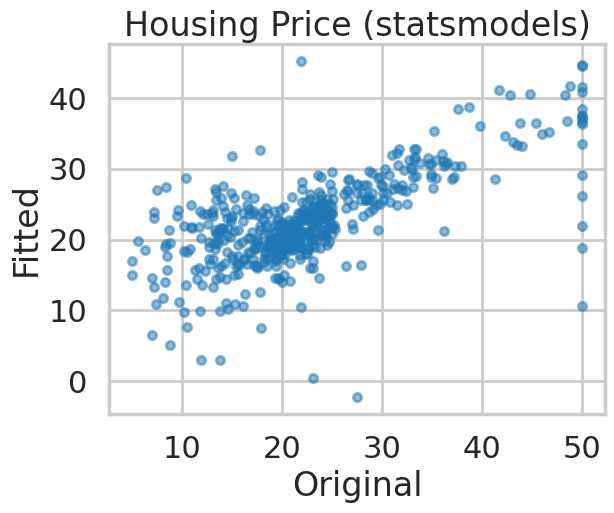

In [26]:
# your turn
plt.scatter(bos.PRICE,m.fittedvalues,marker='.',alpha=0.5)
plt.xlabel('Original')
plt.ylabel('Fitted')
plt.title('Housing Price (statsmodels)')

<div style="color:#b68900"> 

The shape appears to be that of the RM-PRICE scatterplot, flipped across the diagonal.  This is expected, as it is essentially a plot of

$\hat{y} = f(x)$ &nbsp;  $\text{ vs. }$ &nbsp;  $y=f(x)+\epsilon$

while the RM-PRICE plot is essentially

$y = f(x) + \epsilon$ &nbsp;  $\text{ vs. }$ &nbsp;  $x$

where $\hat{y} = f(x)$ is simply a linear transformation of $x$.  Such a transformation would only scale and/or shift the values of $x$, which essentially only changes the range of axes tickmarks on the plot.  Add to that the fact that the axes are flipped, and you have the plot seen above.

</div>

<div style="color:#b68900"> 

To further elaborate this point, a plot of RM and the fitted values is essentially just the linear regression line:

</div>



Text(0.5, 1.0, 'Regression Line')

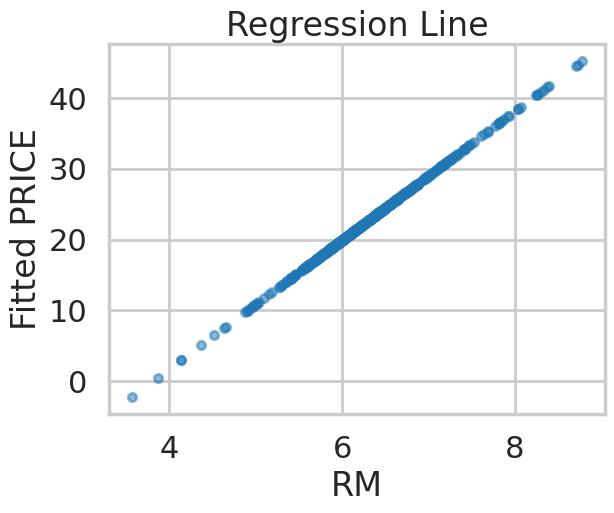

In [27]:
plt.scatter(bos.RM,m.fittedvalues,marker='.',alpha=0.5)
plt.xlabel('RM')
plt.ylabel('Fitted PRICE')
plt.title('Regression Line')

### Fitting Linear Regression using `sklearn`


In [28]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [29]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

In [30]:
[ a for a in lm.__dir__() if not a.startswith('_')]

['fit_intercept',
 'copy_X',
 'n_jobs',
 'positive',
 'fit',
 'set_fit_request',
 'set_score_request',
 'score',
 'predict',
 'get_params',
 'set_params',
 'get_metadata_routing']

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [31]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


<div style="color:#b68900">

#### Regression Through The Origin

<div style="color:#b68900">
    
Currently, the model `lm` is fitted *with* an intercept term, and the value of the intercept is accessible via the ``intercept_`` attribute:

In [32]:
lm.intercept_

36.459488385089955

<div style="color:#b68900">
    
To fit `lm` *without* an intercept term in `sklearn`, we can use the `fit_intercept=False` kwarg when instantiating `LinearRegression()` &mdash; i.e., prior to fitting:

In [33]:
# your turn

# instantiate linear model that does NOT include an intercept term
lm = LinearRegression(fit_intercept=False)

# fit this linear model
lm.fit(X,bos.PRICE)

# check to see the resulting intercept is the origin
lm.intercept_

0.0

<div style="color:#b68900">

##### <u> Fit the Intercept or Not? </u>

The decision to fit without an intercept depends on our understanding/expectations of the predictor/explanatory variables in relation to the target, based on domain-specific knowledge, and particularly regarding what should theoretically happen to the target when the predictor is zero.  In our case, this means for each of the independent variables (`RM`,`CRIM`, etc.): if they were zero, would we expect `PRICE` to be zero as well?

As neither `PRICE` nor any of the predictor variables appear to represent anything that could realistically have a negative value (e.g., impossible to have a negative nitric oxide concentration, pupil-teacher ratio, or crime rate), any predictor variables with a negative relationship must have an intercept > 0. Thus, this rules out the following predictor variables (`X` column) as potentially having an intercept at the origin due to their negative coefficients (`coef` column):

In [34]:
Xs = sm.add_constant(X)
y = np.array(bos.PRICE)
smols = sm.OLS(y,Xs).fit()
xcoefs = pd.DataFrame({'X':bos.drop('PRICE',axis=1).columns,'coef':lm.coef_}).sort_values('coef')
xcoefs[xcoefs.coef < 0]

,X,coef
4,NOX,-2.868436
7,DIS,-0.968514
12,LSTAT,-0.416304
10,PTRATIO,-0.392191
0,CRIM,-0.092897
9,TAX,-0.009396
6,AGE,-0.007269
2,INDUS,-0.004060


<div style="color:#b68900">

That said, the last three (`TAX`,`AGE`,`INDUS`) have coefficients that are exceptionally small in magnitude, suggesting some these where theoretically supposed to have positive relationships with price but were succeptible negative deviations due to random noise.  Looking closer at what they actually represent, as defined in the `housing.names` file of the UCI repo, with additional context from Table IV of the original 1978 source paper (Harrison & Rubin, et al.):

##### `TAX`, defined as the "Full value property tax rate ($/$10,000)".
While one could argue that increased property tax rate is a sign of a wealthy neighborhood with well-funded public services, the authors specifically state that the coefficient for this should be negative, so this confirms it should be ruled out as a candidate for regression through the origin.

<hr>

##### `AGE`, defined as "proportion of property built before 1940", with some context that older houses generally have better structural quality and are thus expected to be pricier on average.  
So we might expect a positive relationship with price here.  However, this still should not pass through the origin.  If `AGE = 0`, that means all houses in that area were built after 1940.  Despite the supposedly minimized average structural quality of houses in this case, these houses should theoretically still have a nonzero value.

<hr>

##### `INDUS`, defined as the "proportion of non-retail business acres."
Like with `TAX`, the authors specifically state that this should affect housing prices negatively. This makes sense intuitively as it is often more desirable to live near retail businesses (e.g., to be close to your local grocery store, pharmacy, etc.).  However, such a desire might contrast with, say, the desire to live near your workplace or a school (i.e., non-retail businesses).  Thus, it makes even more sense that despite a negative correlation overall, the magnitude is quite small.

<hr>


As far as the remaining predictors:

In [35]:
xcoefs[xcoefs.coef >= 0]

,X,coef
11,B,0.014906
1,ZN,0.048715
8,RAD,0.171151
3,CHAS,2.853999
5,RM,5.928148


<div style="color:#b68900">
    
##### `RAD`, an "index of access to radial highways"
Intuitively, one could imagine such an "index" would be zero if none of the houses had any access to radial highways at all, a situation which practically doesn't exist (all houses technically have some access, even if not directly, to a highway).  Sure enough, the minimum value for this variable in the dataset is 1:

In [36]:
bos.RAD.min()

1.0

<div style="color:#b68900"> 

Thus, this would NOT be a candidate for regression through the origin.

</div>

<div style="color:#b68900">

##### `B`, defined as `B = 1000(Bk -.63)^2`, where `Bk` is the "proportions of blacks"
This is NOT a candidate for regression through the origin. &nbsp;Based on the formula, `B = 0` only when `Bk = 0.63` and because of the squared term, `B` can never be negative.  Regardless, it would be unrealistic (and just plain wrong) if `Bk = 0.63` meant the house values were zero.

<hr>

##### `ZN`, defined as "proportion of residential land zoned for lots over 25,000 sq.ft."
This is essentially the proportion of land within a town designated for housing (residential) by the government, in which individual residential lots are all required to have a square-footage of over 25,000.  In other words, the proportion of "large and/or spacious" residential properties defined by the 25K threshold.  This is not a candidate for regression through the origin, as `ZN = 0` simply means that there are no residential lots $> 25,000 ft^2$ in area; there could still be relatively denser-packed houses, but they would still have a nonzero property value.
<hr>

##### `CHAS`, which "captures the amenities of a riverside location and thus the coefficient should be positive." 
This is essentially a binary/boolean variable, where CHAS =0 just means the house doesn't have the riverside amenities and CHAS=1 means it does.  However, you could still have houses without access to those amenities, and therefore nonzero median house values. 

<hr>

##### `RM`, defined as the "Average number of rooms in owner units" which "represents spaciousness and, in a certain sense, quantity of housing."
Like with `ZM`, if `RM = 0` this might suggest there is are no housing units at all and therefore a median house value of zero &mdash; however, it could alternatively mean that an overwhelming majority of units have some sort of studio layout (for apartments) or open layout (for single-level homes) and that "room" is defined with the strict criteria of being a smaller walled space within the unit (i.e., if the whole studio itself or a trailer home, for example, was not considered a single room).  In the case of the latter, the pricing would then be nonzero, and therefore no passing through the origin.

<hr>

As a majority of the features in the dataset do not appear to theoretically pass through the origin when paired with the target variable of `PRICE`, keeping the default configuration of fitting the intercept (`fit_intercept=True`) will be useful.  So I will re-instantiate the model for `lm` accordingly:

</div>

In [37]:
# instantiate linear model that DOES include an intercept term
lm = LinearRegression(fit_intercept=True)

# fit this linear model
lm.fit(X,bos.PRICE)

# check to see the resulting intercept is NOT the origin
lm.intercept_

36.459488385089955

<div style="color:#b68900">

##### <u> Does Normality Alone Satisfy I.I.D.? </u>

The condition that the residuals be independently and identically distributed means that each residual does not influence the value of any other residual (independent) and that each residual comes from the same distribution.  Simply having a distribution that takes the shape of the Gaussian distribution does not automatically suggest independence, so it is not enough to satisfy I.I.D. on its own.

</div>

<div style="color:#b68900">

##### <u>Must $Y$ be normally distributed for linear regression?</u>

**False**;  in addition to i.i.d., linear regression requires normality across the residuals/errors.  However, this does NOT mean that the  response variable, $Y$, must necessarily be normally distributed as well.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [38]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.459488385089955


In [39]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [40]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [41]:
(bos < 0).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [42]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

<div style="color:#b68900"> 

### Histogram for $\hat{y}$

</div>

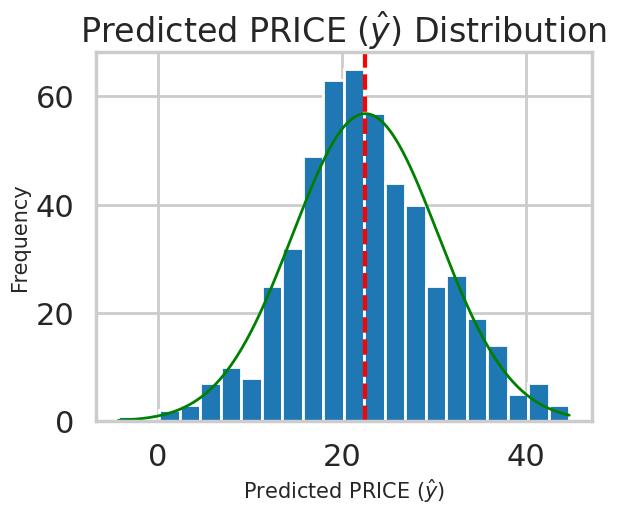

In [43]:
#your turn
y_pred = lm.predict(X)
bos_hist(y_pred,xlabel=f'Predicted PRICE ({r"$\hat{y}$"})',meanline=True, alpha=0.6,gaussplot=True)

In [44]:
len(y_pred)

506

<div style="color:#b68900">

* The distribution appears to approximate a bell-curve shape fairly well with a sample size of 506, centered at around 20 with values seeming to be spread within 0 to 45.
* It is relatively symmetric without significant skew, with the peak/mode just barely undershooting the mean of 22.53 for price.
* It is roughly mesokurtic, although any statistically significant deviations from this would perhaps be described as slightly leptokurtic due to the sharper peak and narrow shoulders relative to the ideal normal curve (green).  It is harder to say what is happening at the tails, but one might argue they do in fact appear a bit thicker (at least on the right side).

</div>

<div style="color:#b68900"> 

#### Outliers for $\hat{y}$

</div>

In [45]:
# Calculate outliers using the conventional 1.5 x IQR threshold:

# Calculate IQR & establish outlier threshold
q1 = np.quantile(y_pred,0.25)
q3 = np.quantile(y_pred,0.75)
iqr = q3-q1
outlier_thresh = iqr * 1.5

# Identify outliers above and below
ol_above = (y_pred > (q3 + outlier_thresh))
ol_below = (y_pred < (q1 - outlier_thresh))

# Pringt outlier counts
print(f"{ol_above.sum()} positive outliers,{ol_below.sum()} negative outliers, {ol_above.sum()+ol_below.sum()} total")

3 positive outliers,3 negative outliers, 6 total


In [46]:
# POSITIVE outliers (above)
y_pred[ol_above]

array([43.18949844, 43.30239043, 44.67308339])

In [47]:
# NEGATIVE outliers (below)
y_pred[ol_below]

array([ 0.77779806,  1.71851807, -4.28131071])

<div style="color:#b68900">

There are outliers on both sides of the curve.  

As far as the exceptionally high prices, those can plausibly be explained by a select minority of luxury housing options in boston; the introduction of luxury markets / selective pressures generally adds a right-skewing effect (albeit fairly minor in this case) / tendency towards a pareto distribution.  

Of the exceptionally low prices, most are potentially plausible as aside from the nonsensically negative value.  This likely just the result of the regression line in $\mathbb{R}^p$ extending infinitely in both directions, including the "lower" end.  This is potentially just a limitation of linear models and not necessarily a flaw the data.   To determine if the whole observation, including predictor values, should be dropped will likely require further EDA.  For now, we can simply clip the `y_pred` result when reporting it, essentially replacing any negatives with zero:
</div>

In [48]:
y_pred_clipped = np.maximum(y_pred,0)
y_pred_clipped[ol_below]

array([0.77779806, 1.71851807, 0.        ])

<div style="color:#b68900"> 

### Scatterplot

</div>

Text(0.5, 1.0, 'Housing Price (sklearn)')

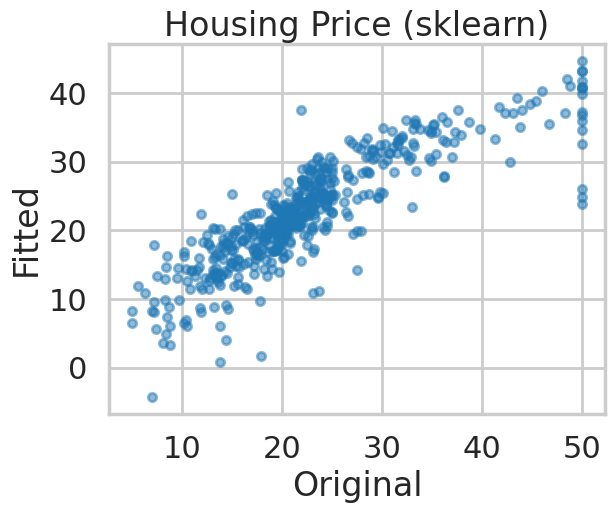

In [49]:
# Fitted vs. Original plot, this time using y_pred from sklearn instead of m.fitted_values from statsmodels
plt.scatter(bos.PRICE,y_pred,marker='.',alpha=0.5)
plt.xlabel('Original')
plt.ylabel('Fitted')
plt.title('Housing Price (sklearn)')

<div style="color:#b68900"> 

### `sklearn` vs. `statsmodels` for Linear Regression

</div>

<div style="color:#b68900">
    
In my exploration so far, I found that `sklearn` gave accurate predictions and integrated smoothly into a modeling workflow, producing the same predictions as `statsmodels` (i.e., when comparing the plot above with the one earlier in this notebook, they look identical).  However, it lacks many built-in tools for deeper analysis of the model; to report certain statistics, or multiple in combination, it requires more "work" / custom coding (e.g., to print out the intercept / coefficients). That said, this also might have some advantage in terms of modularity.  In contrast, `statsmodels` offers direct access to detailed regression outputs which are individually accessible as attributes of the model, while a great portion of these can conveniently be reported together using the `summary()` method.  While this can be very powerful, convenient, and efficient, there is potentially less modularity / ability to customize some of the outputs if really necessary.  Additionally, while the syntax took a bit to get used to, the ability to use string formulas like `"PRICE ~ RM"` makes it somewhat more supportive of `pandas` DataFrames than `sklearn`, in much the same way that `seaborn` is better-integrated with such DataFrames compared to its `matplotlib` foundation alone; i.e., in both `statsmodels` and `seaborn`, you can pass in the whole DataFrame itself and then specify what to do and with which columns to do it with. 

Based on what is provided about the packages publicly, it would seem that `statsmodels` is generally a more robust tool for statistical modeling and inference when statistical rigor and interpretability is especially important (e.g., research/academic environments). The comprehensive summary tables, p-values, confidence intervals, intercepts, coefficients, fitted values, etc. make it much more efficient for evaluating models on a deep statistical/mathematical level, along with clearly reporting key metrics commonly used in academic statistics.  It's similarity to the statistical programming software **R** is also quite suggestive of this.  Meanwhile, `sklearn` appears to be more optimized for integration within machine-learning pipelines (e.g., industry/business environments) due to its support for relevant techniques such as train-test splits, cross-validation, hyperparameter tuning, and feature engineering.  Its simplicity and speed are ideal for production environments but offer fewer tools for understanding the statistical properties of the model. Thus, in the context of this notebook (which, let's keep in mind, began with a derivation of the least squares regressor from a differential equation), it would seem that `statsmodels` has clear advantages over `sklearn`.

</div>

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [50]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954975


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [51]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064634


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

<div style="color:#b68900"> 

#### Linear Regression with `'PTRATIO'`

</div>

In [52]:
# your turn
ptratio_model = ols('PRICE ~ PTRATIO',bos).fit()
ptratio_model.params

Intercept    62.344627
PTRATIO      -2.157175
dtype: float64

In [53]:
# check minimum PTRATIO value (relevant to interpreting intercept)
bos.PTRATIO.min()

12.6

<div style="color:#b68900"> 

This **coefficient** suggests a decrease in housing price of ~2.16 units for every unit of increase in the pupil-teacher ratio; negative correlation with magnitude of ~2.16.  This makes sense intuitively, at least as far as the negative direction, since a low PTRATIO typically means better academic performance because teachers in charge of fewer students can devote more time and attention to each student.

The **intercept** predicts that the price would increase and approach theoretical maximum of ~62.34 as pupil-teacher ratio approaches 0; this is theoretical in that (1) there are no actual cases of PTRATIO less than 12.6, and (2) it is unrealistic to even aim for 0 pupils for every teacher - then there would be no one to teach.  Perhaps the theoretical ideal might be something more like PTRATIO = 1, where every student gets 1-1 tutoring with a teacher, although there clearly isn't any town in Boston with that ratio.

</div>

<div style="color:#b68900"> 

<u>$R^2$ Calculation</u>

</div>

In [54]:
r2_ptr = ptratio_model.rsquared
r2_ptr

0.2578473180092229

<div style="color:#b68900"> 

The $R^2 \approx 0.2578$ suggests that only ~25.78% of the variance in price is explained by the model.  This is somewhat better than a baseline model that predicts the mean price every time ($R^2=0$), but far worse than a perfect model that predicts the exact true PRICE for every PTRATIO you give it ($R^2=1$).

If we visualize the model itself against the data points, it is clear that that the data points are quite widely scattered about the line, so a low $R^2$ would be expected:
</div>

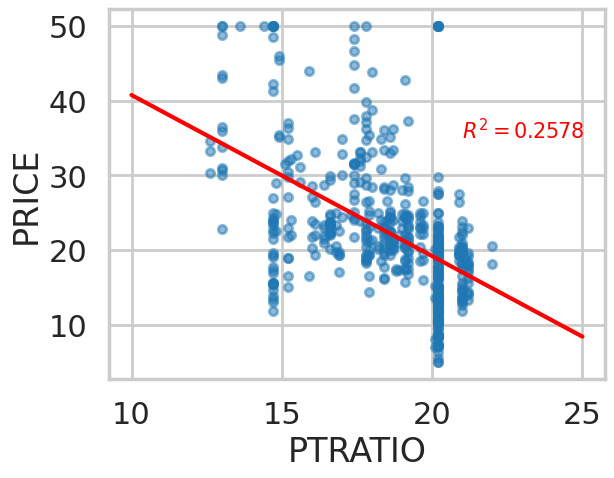

In [55]:
xmin,xmax = (10,25)
xvals = np.linspace(xmin,xmax,100)
yvals = ptratio_model.params.iloc[1]*xvals + ptratio_model.params.iloc[0]
plt.plot(xvals,yvals,color='red')
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.text(21,35,f"$R^2 = {r2_ptr:.04f}$",fontsize=15,color='red')
plt.scatter(bos.PTRATIO,bos.PRICE,marker='.',alpha=0.5)


<div style="color:#b68900"> 
<u>F-statistic Calculation</u>
</div>



 



In [56]:
F_stat = ptratio_model.fvalue
F_stat

175.10554287569536


<div style="color:#b68900"> 
    
As opposed to $R^2 \in \left[0,1\right]$, which describes the proportion of the variation in y (PRICE in this case) explained by the model out of the total variation observed in y, $F \in \left[0,\infty\right)$ is a comparison of this explained variation relative to the unexplained variation (i.e., the residual/error, how much it fails to predict).  Thus, $F$ is more of ratio that has been scaled by the degrees of freedom, rather than a proportion.

So, for $F \approx 175.1$, this suggests that the amount of variance explained by the model per independent variable (in this case, this is just one) is ~175.1 times larger than the amount of variance that is due to random noise, scaled by the degrees of freedom.

This statistic can be used in hypothesis testing as a general measure of how well the model explains the variance relative to a "null" model.  In other words, a model without any coefficients (i.e., assumes no relationship between any of the explanatory variables and the target, thus predicting $\hat{y}_i = \bar{y}$ for all $i$) can sometimes give be fairly close to the true y values due to the random variation in y (i.e., sometimes the value of y will truly be its own mean or close to it, but this is not necessarily representative of the trend as a whole).  If F is significantly large, it suggests that the independent variables that were used to fit the model likely made a difference overall in the model's ability to predict the true y values beyond just the random chance of the data just happening to be near the average sometimes.
</div>


<div style="color:#b68900"> 
<u>t-statistic of $\hat{\beta}_1$</u>

While the F-statistic is a measure of statistical significance for the whole regression model, one can calculate a t-statistic as a measure of statistical significance for each of the model's coefficients $\hat{\beta}_j$ where $j \in \mathbb{Z}_{>0} $.  

In this case, there is only one independent variable (PTRATIO), and therefore only one coefficient: $\hat{\beta}_1 \approx -2.0309$

In `statsmodels`, the fitted linear model has the t-statistics stored in the `tvalues` attribute for the intercept ($\beta_0$) at index 0 and every other $\beta_i$ thereafter, with the index matching the subscript in every case.  In this case, we are interested in index 1, where the t-statistic for the coefficient $\beta_1$ should be: 



</div>



 



In [57]:
# access the value at index 1 of the tvalues attribute (this is the coefficient, while index 0 is just the intercept) 
t_stat = ptratio_model.tvalues.iloc[1]
t_stat

-13.232745099777878

In [58]:
# squaring t_stat gives a similar value to F_stat...
t_stat**2

175.10554287569545

In [59]:
ptratio_model.fvalue

175.10554287569536

In [60]:
# check how precise this relationship is computationally
dpls = 1
while round(t_stat**2,dpls) == round(F_stat,dpls):
    dpls+=1

print(f"The calculated t-statistic squared is equal to the calculated F-statistic up to the {dpls-1}th decimal place:\n\nt^2\t:\t{t_stat**2:.012f}\nF\t:\t{F_stat:.012f}")

The calculated t-statistic squared is equal to the calculated F-statistic up to the 13th decimal place:

t^2	:	175.105542875695
F	:	175.105542875695


<div style="color:#b68900"> 

It appears that the relationship $F = t^2$ holds, at least in the case of simple linear regression (only one coefficient / independent variable). 

</div>

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [61]:
# your turn

# fit linear model with three independent variables (k=3)
k3_formula = "price ~ crim + rm + ptratio".upper()
k3model = ols(k3_formula,bos).fit()

In [62]:
# F-statistic
k3model.fvalue

245.1644903006464

In [63]:
# R-squared
k3model.rsquared

0.5943412940723473

<div style="color:#b68900">

This suggests that the model is able to explain ~59.43% ($R^2 \approx 0.5943$) of the total variance in y, and that this is ~245.16 times ($F \approx 245.1645$) as good as a baseline model without any coefficients.

</div>

In [64]:
# View the second table from the summary to see how the coefficients compare in significance
k3model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.3707,4.034,-0.836,0.404,-11.296,4.555
CRIM,-0.2050,0.032,-6.399,0.000,-0.268,-0.142
RM,7.3804,0.402,18.382,0.000,6.592,8.169
PTRATIO,-1.0695,0.133,-8.051,0.000,-1.331,-0.809


<div style="color:#b68900"> 
    
Assuming a significance level of $\alpha=0.05$, all p-values for the coefficients of predictor variables are less than $\alpha$ and therefore are statstically significant; in fact, the p-values are so low that all of them register as 0.000 in the table.  Looking at the magnitudes of the t-statistics, it would appear that the ranking from highest to lowest in significance is: `RM` > `PTRATIO` > `CRIM` (also in agreement with the magnitudes of the coefficients themselves).  Intuitively, `PRICE` might be expected to have the most direct/strong correlation with `RM`, which was noted to represent "a measure of spaciousness" / "qty. of housing" earlier; i.e., the larger a unit of something is, the higher the price for that unit.  Meanwhile, the `PTRATIO` and `CRIM` have fairly closer t-statistics (that for `RM` is more than two times the size in magnitude compared to each of theirs), and can potentially both represent variables that do influence `PRICE` but are less direct, and therefore have much more "mechanistic room" between them and the outcome of `PRICE` within which other factors may influence the net effect. For example, while low crime rates are generally more desirable and hence result in higher prices on average, the spread of prices is fairly large at `CRIM = 0` because other factors (e.g., `RM`) can still bring the price way down (e.g., a very small townhouse unit in a safe neighborhood) or way up (e.g., a mansion in a safe neighborhood).  The `PTRATIO` is similarly influenced by other factors, for example, as not every home-owner is enrolled in school or has school-aged children, partially making this variable irrelevant to price.

</div>

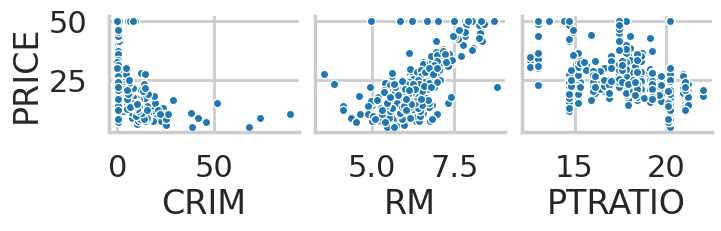

In [65]:
# plot of PRICE with respect to the three variables for visual reminder of their relationships  
sns.pairplot(data=bos,y_vars='PRICE',x_vars="crim rm ptratio".upper().split(' '),markers='.')

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [66]:
# Add two new column names to previous formula and fit all 5 independent variables to linear model (k=5)
k5_formula = k3_formula + " + nox + lstat".upper()
k5model = ols(k5_formula,bos).fit()

In [67]:
# Perform comparative F-test and extract comparative F-statistic & p-value
F_comp,p_comp,df_diff = k5model.compare_f_test(k3model)

print(f"F-statistic: {F_comp}\np-value: {p_comp}")

F-statistic: 68.57580902736812
p-value: 4.80621836786023e-27


<div style="color:#b68900">

In theory, an F-statistic of 0 would suggest identical performance between the models.  Otherwise, the larger the F-statistic, the more different the models are.  Since the p-value is practically negligible in size, we can reasonably reject the null hypothesis ($H_0: F = 0$) and conclude that this difference of $F \approx 68.58$ is statistically significant.  

Specifically, this "comparative F-statistic" is from the perspective of the **full model**, so rejecting $H_0$ is essentially saying that the **full model (k=5)** is better than the **reduced model (k=3)**.  In terms of our data, this means the model that includes the 5 independent variables ( `CRIM`, `RM`, `PTRATIO`, `NOX`, `LSTAT` ) is likely better than the one with only 3 independent variables (`CRIM`, `RM`, `PTRATIO`).

</div>

In [68]:
# Access AIC of each model and compare
print(f"AIC_full:\t{k5model.aic}\nAIC_reduced:\t{k3model.aic}")

AIC_full:	3113.290952382385
AIC_reduced:	3231.9451235449956


<div style="color:#b68900"> 

With $\text{AIC}_{K=5} < \text{AIC}_{K=3}$ ($\text{AIC}_{full} < \text{AIC}_{reduced}$), this further confirms that the full model (K=5) is better.

</div>


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

<div style="color:#b68900"> 

### 1. Residuals vs. Fitted Values

</div>

<div style="color:#b68900"> 
    
#### *FVR Plot*

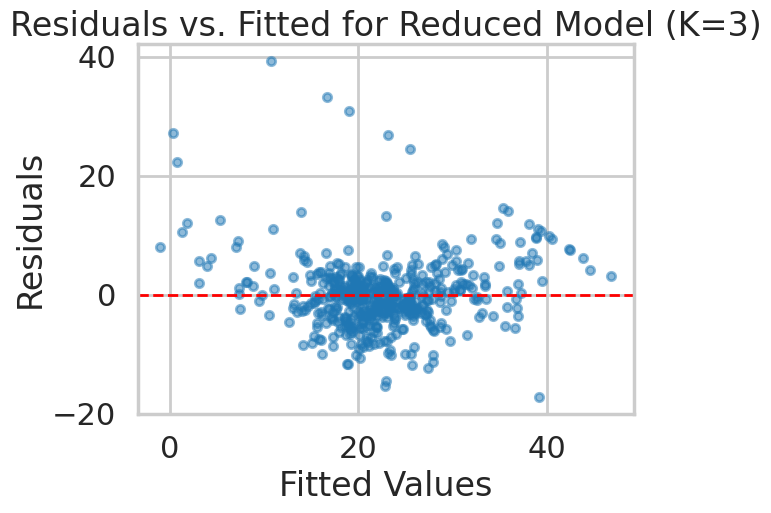

In [69]:
def plotRvF(fittedModel,modelName):
    # Access fitted values and residuals from the fitted model
    fvals = fittedModel.fittedvalues
    rvals = fittedModel.resid
    
    # Plot fitted residuals vs. fitted values
    plt.scatter(fvals,rvals,alpha=0.5,marker='.')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.axhline(0,color='red',linestyle='--', linewidth=2)
    plt.title(f'Residuals vs. Fitted for {modelName}')

# # Access fitted values and residuals from the fitted model
# fvals = fitted.fittedvalues
# rvals = fitted.resid

# # Plot fitted residuals vs. fitted values
# plt.scatter(fvals,rvals,alpha=0.5,marker='.')
# plt.xlabel('Fitted Values')
# plt.ylabel('Residuals')
# plt.axhline(0,color='red',linestyle='--', linewidth=2)
# plt.title('Residuals vs. Fitted for Reduced Model (K=3)')

plotRvF(k3model,'Reduced Model (K=3)')

<div style="color:#b68900"> 
    
#### *Interpretation & Insights r.e. Model Assumptions*

**Linearity** : most of the residuals appear to scatter randomly around 0, with some outliers in the extremes of positive at the top of the plot, but no clear pattern / curve.  This suggests that the assumption of linearity holds true.

**Homoscedasticity** : the range of residuals ($y_i - \hat{y}_i$) appear to start relatively broad at lower fitted values ($\hat{y}_i$), and then generally becomes narrower as the fitted values increase.  So in a somewhat lop-sided way, the residuals funnel inward from left to right, suggesting decreasing variance in $\mathbf{y}$ (with residuals as a proxy) from left to right (with fitted values as a proxy for the different values of $\mathbf{X}$.  This would imply **heteroscedasticity**, and thus a violation of the assumption of constant standard deviation of $\mathbf{Y}$ for different values of $\mathbf{X}$.

<div style="color:#b68900"> 

### 2. Quantile Plot of Residuals

</div>

<div style="color:#b68900"> 
    
#### *QQ Plot*

Text(0.5, 1.0, 'QQ Plot of Residuals')

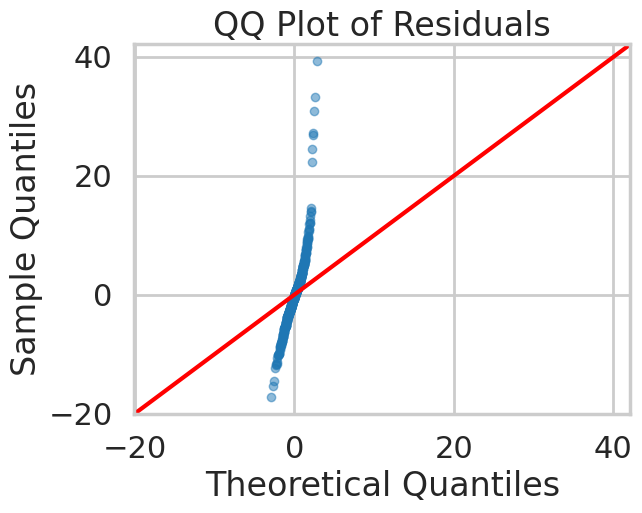

In [70]:
sm.qqplot(k3model.resid,line='45',marker='.',alpha=0.5)
plt.title('QQ Plot of Residuals')

<div style="color:#b68900"> 
    
#### *Interpretation & Insights r.e. Model Assumptions*

The QQ plot is essentially a more powerful visual method than a histogram for assessing the **normality** assumption for linear regression ($\epsilon_i \sim \mathcal{N}\left(0,\sigma^2\right)$).  Instead of looking at the distribution of residuals directly and trying to "eyeball" how much it resembles a "bell-curve", the quantiles of the residuals are plotted against the quantiles of a standard normal distribution.  As such, the red 45 degree line represents the situation where the residuals perfectly match a standard normal distribution.  Meanwhile, the actual plotted residuals roughly resemble a straight line, which suggests that its distribution does take on a Gaussian in shape, although the higher slope relative to the red line indicates that there is higher variance than a standard normal distribution ( $ \sigma^2 > 1 $ ).

The mean of 0 in $\epsilon_i \sim \mathcal{N}\left(0,\sigma^2\right)$ is simply an acknowledgement that due to the nature of least-squares regression, the residuals will always have a mean of 0.  The result is that the QQ plot will always intersect with the red line at the origin &mdash; if this is not the case, then a mistake was likely made during creation and/or fitting of the model.  

So overall, this QQ plot at a glance appears to be telling us that our model satisfies the normality assumption for linear regression.  However, it is worth noting the presence of outliers (the data points at the extremes that appear fainter due to less overlap with other data points); as outliers are far out from the main cluster of points, the whole plot must be relatively zoomed out from this main cluster in order to include all points in the dataset.  As a result, any subtle deviations from a linear QQ plot in the main cluster will be harder to see.  In fact, looking more carefully at the main cluster of data points, there seems to be a slightly inverse sigmoid shape to it, which would suggest a more heavy-tailed (leptokurtic) distribution, which might become more apparent if the outliers were not included.

<div style="color:#b68900"> 

### 3. Comparison of Residuals vs. Fitted Plots (RvF) and Quantile-Quantile (QQ) Plots

The **RvF plot** can provide a nice first-look at the assumptions of (1) **Linearity** and (2) **Constant Standard Deviation**, while the **QQ plot** is primarily a powerful tool for assessing the **Normality** assumption.  So off the bat, they are respectively advantaged by what assumptions they are good at assessing and disadvantaged by that which they are not good for assessing.  Of the many assumptions for linear regression, the RvF plot covers more than the QQ plot, so perhaps this is the greater advantage of the former.

However, interpretation of the RvF plot can be relatively subjective.  Humans can be prone to both seeing subtle patterns when there are none and overlooking subtle patterns when they actually are present.  Meanwhile, in the case of the QQ plot, it can be straightforward in comparison to visually confirm that a line looks straight or not, especially when juxtaposed against a truly straight line.  Due in part to this, the QQ plot also won't be as affected by a smaller sample size compared to the RvF plot &mdash; i.e., it might be somewhat harder to to see how well a small set of data points line up along a linear path, but it is typically way harder to determine if there is a pattern in scattering if there are only a few data points.

That said, the QQ plot is sensitive to outliers - as discussed in the previous cell, outliers can obscure more subtle deviations from linearity for the QQ plot and thereby obscure deviations from normality for the residuals.  As done above, the presence of outliers themselves can at least be made somewhat more distinct by lowering transparency of data point markers, but this changes nothing about how patterns in the main cluster might be obscured.  The RvF plot, in contrast, does not suffer as much from this, especially if there is a decent sample size, in which a clear distinction is made between lone points out in the distance and the main cluster of points about the horizontal zero line.  

<div style="color:#b68900"> 

### 4. Outliers

</div>

<div style="color:#b68900"> 
    
#### *Identifying Outliers*

While the residuals ($\epsilon_i$) of a valid model (i.e., assumptions met) might not necessarily have $\sigma^2=1$ despite $\epsilon_i \sim \mathcal{N}\left(0,\sigma^2\right)$, we can *standardize* the residuals so that this is the case.  This is done by scaling the residual by an estimate of variability (discussed more later).  The Student's t-statistic similarly involves scaling by a measure of variability (standard error), so the standardized residual is also known as the *studentized* residual ($r_i^*$).  It can be approximately said that:

$$\epsilon_i^* \sim \mathcal{N}\left(0,1\right)$$

Thus, a common convention is that observations with standardized residuals of magnitude greater than 2 ($\epsilon_i^* > 2$) are considered outliers &mdash; this is equivalent to saying the resduals are $>2\sigma$ from the mean, thereby accounting for a little less than 5% of the most extreme values in either direction.

Nevertheless, we don't need to explicitly calculate this in practice.  When using a model fitted in `statsmodels`, one can generate a ``statsmodels.stats.outliers_influence.OLSInfluence`` type object from the fitted model using the `.get_influence()` method, and this object will have a variety of useful statistics saved already saved within it, including an array of all standardized residuals for the model inside of the `.resid_studentized_internal` attribute (there is also `.resid_studentized_external`, which will also be discussed later).

In [71]:
# Generate influence object from fitted sm model
influence = k3model.get_influence()

# Access array of standardized residuals for 
std_resid = influence.resid_studentized_internal

# Create boolean mask based on the condition |standardized residuals| > 2
outlier_mask = abs(std_resid) > 2

# Obtain indices of the outlier observations using the mask
outlier_indices = np.where(outlier_mask)[0]

In [72]:
# Obtain column names of input data for k3model to use in subsetting bos dataframe
k3cols = k3model.model.exog_names + [k3model.model.endog_names]
k3cols.remove('Intercept')
print(k3cols)

# Subset bos dataframe to get dataframe with only relevant columns to k3model
k3all = bos[k3cols]
k3all.head()

['CRIM', 'RM', 'PTRATIO', 'PRICE']


,CRIM,RM,PTRATIO,PRICE
0,0.00632,6.575,15.3,24.0
1,0.02731,6.421,17.8,21.6
2,0.02729,7.185,17.8,34.7
3,0.03237,6.998,18.7,33.4
4,0.06905,7.147,18.7,36.2


In [73]:
### Subset dataframe to extract the outliers using the outlier indicies 
k3_outliers = k3all.iloc[outlier_indices,:]
k3_outliers.count()

CRIM       21
RM         21
PTRATIO    21
PRICE      21
dtype: int64

In [74]:
k3_outliers.index

Index([ 10, 145, 161, 162, 181, 186, 228, 364, 365, 367, 368, 369, 370, 371,
       372, 374, 401, 407, 412, 416, 419],
      dtype='int64')

In [75]:
outlier_indices

array([ 10, 145, 161, 162, 181, 186, 228, 364, 365, 367, 368, 369, 370,
       371, 372, 374, 401, 407, 412, 416, 419])

<div style="color:#b68900"> 
    
#### *Interpretation: What the Outliers Might Represent*

In [76]:
# Summarize outlier stats
k3_outliers.describe()

,CRIM,RM,PTRATIO,PRICE
count,21.000000,21.000000,21.000000,21.000000
mean,7.077443,6.226000,18.814286,31.757143
std,6.025031,1.388231,2.176990,17.270367
min,0.056020,3.561000,14.700000,7.200000
25%,1.833770,5.608000,17.800000,15.000000
50%,5.669980,6.343000,20.200000,27.900000
75%,11.812300,7.016000,20.200000,50.000000
max,18.811000,8.780000,20.200000,50.000000


In [77]:
# Get indices of all other rows besides the outliers
nonoutlier_indices = [i for i in k3all.index if i not in outlier_indices]

# Subset the non-outlier rows
k3nonol = k3all.iloc[nonoutlier_indices,:]

# Get statistical summary
k3nonol.describe()

,CRIM,RM,PTRATIO,PRICE
count,485.000000,485.000000,485.000000,485.000000
mean,3.463539,6.287173,18.440000,22.133402
std,8.669115,0.659772,2.165337,8.489999
min,0.006320,4.138000,12.600000,5.000000
25%,0.079780,5.888000,17.300000,17.100000
50%,0.229690,6.202000,19.000000,21.100000
75%,2.779740,6.606000,20.200000,24.800000
max,88.976200,8.725000,22.000000,50.000000


<div style="color:#b68900"> 

Comparing the outliers to non-outliers across the different predictors, it appears the main difference lies between their CRIM values.  So in general, the outliers likely represent some anomaly within CRIM.  

From a more intuitive / qualitative perspective, this doesn't seem too suprising. That is, one can imagine that the crime rate per capita (CRIM) is more prone to producing outliers compared to rooms per dwelling (RM) and pupil-teacher ratio (PTRATIO) due to the nature of its distribution and underlying drivers. All of these are naturally bounded from below (i.e., can't technically have negative crime so CRIM can't be any less than 0, you have to have a certain minimum number of rooms for a dwelling to be practical, and the best you can get for a pupil-teacher ratio is 1:1 tutoring although even that is fairly limited due to economic constraints).  However, crime rates theoretically have no natural or institutional upper limit, making extreme values more plausible despite being rare.  A wide range of incidents &mdash; from minor infractions to serious offenses &mdash; can contribute to the total, and certain towns may experience rare, transient, yet high-impact conditions such as economic downturns, social unrest, weakened enforcement, or natural disasters that could potentially lead to significant spikes in crime rates. In contrast, rooms per dwelling is constrained from the topy by practical, cultural, and economic factors: individuals generally need at least one room, and the number of rooms is limited by space, construction costs, and living norms. Similarly, the student-teacher ratio is limited by logistical feasibility and educational policy—class sizes can only grow so large before instruction becomes ineffective or violates regulation. These constraints make extreme values for RM and PTRATIO less common, whereas CRIM remains more open at the positive end, and any conditions that limit it from that end (increased law enforcement, reinforced infracstructure, etc.) can never prevent with 100% certainty the rare and transient extreme circumstances mentioned earlier.

<div style="color:#b68900"> 

### 5. Standardized Resdiduals vs. Leverage Plot

</div>

<div style="color:#b68900"> 
    
A leverage plot is ultimately a plot of **standardized residuals($\epsilon_i^*$)** vs. **leverage($h_{ii}$)**, and data points that are far out to the corners are considered for further investigation / potential removal from the data set.

<div style="color:#b68900"> 
    
#### Leverage

</div>

<div style="color:#b68900"> 
    
Recalling the general expression for the **least squares estimator** derived at the beginning of this notebook:

$$\hat{\boldsymbol{\beta}} =  (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}$$ 

<div style="color:#b68900"> 
    
The term $(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top$ is, by definition, a matrix $\mathbf{H}$ known as the **projection matrix** or **hat matrix** (since it "puts a hat on" the $\boldsymbol{\beta}$).  Of relevance here, the set of all leverage values for all observations in the data set is the diagonal of this matrix.  

Thus, for a given observation (i.e., the $i$-th observation) the **leverage** of that observation ($h_{ii}$) is the $i$-th element of the hat matrix's diagonal:

$$h_{ii} \equiv \mathbf{x}_i^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_i$$

In practice, we can easily access the whole diagonal of the hat matrix in the ``.hat_matrix_diag`` attribute of the ``influence`` object we generated earlier from the fitted model, which can be further subset by index to get the desired leverage value if desired. 

</div>

In [78]:
# access the set of all leverage values from the influence object obtained earlier (from the fitted k3model)
leverage = influence.hat_matrix_diag

# check the shape
leverage.shape

(506,)

<div style="color:#b68900"> 
    
#### Standardized Residuals

</div>

<div style="color:#b68900"> 
    
As mentioned earlier, the **standardized residual** ($r_i^*$) for a given prediction, is essentially the residual for that prediction ($r_i$) scaled by an estimate of variability.  As the Student's t-statistic is also the result of scaling of deviations in a parameter of interest (e.g., mean) by a measure of variability (standard error), the standardized residual is also referred to as the <u>studentized</u> residual.  A basic version of this is the *internally* studentized residual: 

<u>Internally Studentized Residual</u>

$$\epsilon_i^* = \frac{\epsilon_i}{\hat{\sigma} \sqrt{1-h_{ii}}}$$

where

+ $\hat{\sigma}$ is the root-mean-squared-error (RMSE) of the model
+ $h_{ii}$ is the **leverage** of the data point for this prediction

<br>
<hr>

However, note that $\hat{\sigma}$ will by default include residuals for all data, including the one you are calculating the standardized residual for.  If this data point happens to be an outlier, it would mess with RMSE as an accurate estimate of variance for the model.  To correct for this, it can be specified that when calculating the standardized residual for the $i$-th observation, that RMSE is calculated using all other observations except for this $i$-th observation.  In doing so, it is known as the *externally* studentized residual:

<u>Externally Studentized Residual</u>

$$\epsilon_i^* = \frac{\epsilon_i}{\hat{\sigma}_{(i)} \sqrt{1-h_{ii}}}$$

where the parenthetical subscript $(i)$ of $\hat{\sigma}$ means to calculate it without the $i$-th observation.

<hr>

The set of all standardized residuals for both types of standardized residuals are also conveniently accessible as attributes of the `influence` object generated earlier.  While the **externally studentized residual** is technically more accurate, the **internally studentized residual** does just fine for data visualization &mdash; so I will be using that one.

In [79]:
stdresids_int = influence.resid_studentized_internal # Otherwise would use `stdresids_ext = influence.resid_studentized_external` if the externally studentized residual is desired 

stdresids_int.shape

(506,)

Text(0, 0.5, 'Standardized Residual')

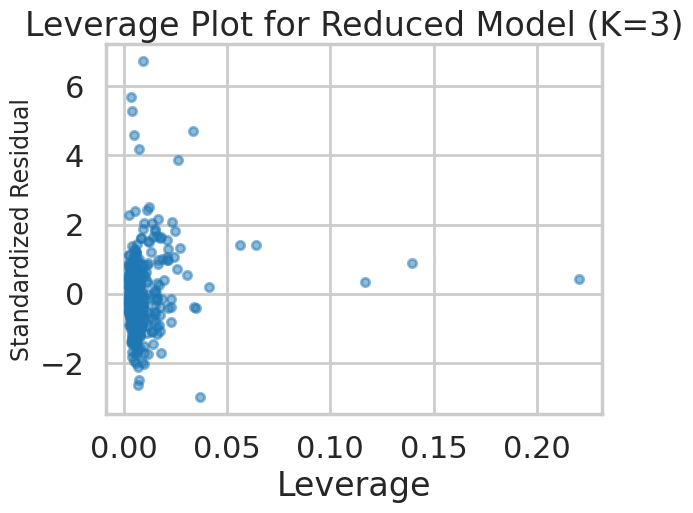

In [80]:
# Leverage plot using internally studentized residual
plt.scatter(leverage,stdresids_int, marker='.', alpha=0.5)
plt.title('Leverage Plot for Reduced Model (K=3)')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residual',fontsize=17)

<div style="color:#b68900"> 
    
#### *High Leverage Points:*

While all leverage values are along the diagonal of the hat matrix, the trace (sum of the diagonal elements) of the hat matrix happens to be equal to the number of columns $p$ of the design matrix, and so the mean leverage value ($\bar{h}$) is equal to:

$$\bar{h} = \frac{\sum_{i=1}^{n} h_{ii}}{n} = \frac{p}{n}$$

By convention, a data point is typically considered high-leverage if $h_{ii} > \frac{2p}{n}$ ; i.e., if it is greater than two times the average leverage ($h_{ii} > 2\bar{h}$)

In [81]:
# Access the design matrix (k3X) of the k3model - i.e., all of the independent variables in a 2-D array without column names
k3X = k3model.model.exog

# Set high-leverage threshold (hl_threshold) as defined in formula of previous cell, with the p being the "width" (ncols) of the design matrix and n being the "height" (nrows)
hl_threshold = 2 * k3X.shape[1] / k3X.shape[0]

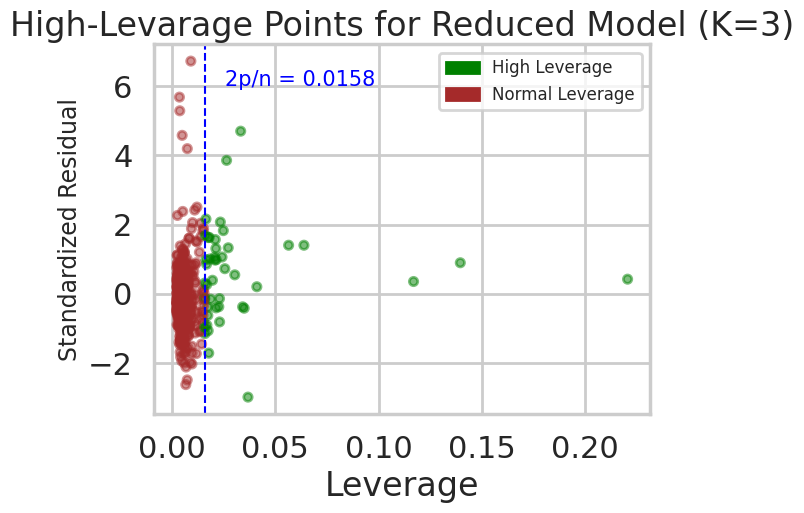

In [82]:
# Visualize high-leverage points
import matplotlib.patches as mpatches

colors = np.where(leverage > hl_threshold, 'green','brown')
plt.scatter(leverage,stdresids_int, marker='.', alpha=0.5,c=colors)
plt.title('High-Levarage Points for Reduced Model (K=3)')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residual',fontsize=17)
plt.axvline(hl_threshold,linestyle='--',color='blue',linewidth=1.5)
plt.text(s=f"2p/n = {hl_threshold:.04f}",x=hl_threshold+0.01,y=6,fontsize=15,color='blue')

green_patch = mpatches.Patch(color='green', label='High Leverage')
brown_patch = mpatches.Patch(color='brown', label='Normal Leverage')
plt.legend(handles=[green_patch, brown_patch],loc='upper right', fontsize=12)

In [97]:
# Add column in k3all for leverage values of each row/observation
k3all.loc[:,'leverage'] = leverage 
k3all.head()

,CRIM,RM,PTRATIO,PRICE,leverage,high_lev
0,0.00632,6.575,15.3,24.0,0.006208,False
1,0.02731,6.421,17.8,21.6,0.002397,False
2,0.02729,7.185,17.8,34.7,0.005347,False
3,0.03237,6.998,18.7,33.4,0.004736,False
4,0.06905,7.147,18.7,36.2,0.005811,False


In [98]:
# Add boolean column to categorize high vs. low leverage based on threshold
k3all.loc[:,'high_lev'] = k3all['leverage'] > hl_threshold

# Group and count high vs low leverage rows
k3all.groupby('high_lev').count()

,CRIM,RM,PTRATIO,PRICE,leverage
high_lev,,,,,
False,460,460,460,460,460
True,46,46,46,46,46


<div style="color:#b68900"> 
Based on the threshold, 46 out of the total 506 observations were identified as being high-leverage.

<div style="color:#b68900"> 
    
#### *Interpretation: Possible Reasons for High-Leverage Points*

In [85]:
# Analyze difference between high-leverage points across their independent variables
k3all.groupby('high_lev').describe().T

high_lev             False      True 
CRIM     count  460.000000  46.000000
         mean     2.522832  14.520440
         std      4.554210  22.022091
         min      0.006320   0.015010
         25%      0.078832   0.535715
         50%      0.212850   2.349805
         75%      2.755072  20.558375
         max     25.046100  88.976200
RM       count  460.000000  46.000000
         mean     6.272689   6.404087
         std      0.543458   1.584771
         min      4.880000   3.561000
         25%      5.913750   5.162750
         50%      6.209000   6.079500
         75%      6.569000   8.006250
         max      8.040000   8.780000
PTRATIO  count  460.000000  46.000000
         mean    18.609348  16.917391
         std      1.981213   3.146589
         min     13.000000  12.600000
         25%     17.400000  13.875000
         50%     19.100000  17.400000
         75%     20.200000  20.200000
         max     22.000000  20.200000
PRICE    count  460.000000  46.000000
         mean    22.192609  25.934783
         std      8.215832  15.739705
         min      5.600000   5.000000
         25%     17.400000  12.200000
         50%     21.200000  20.750000
         75%     24.800000  42.525000
         max     50.000000  50.000000
leverage count  460.000000  46.000000
         mean     0.005442   0.032536
         std      0.002881   0.037056
         min      0.002283   0.015835
         25%      0.003360   0.017328
         50%      0.004533   0.021125
         75%      0.006560   0.027039
         max      0.015527   0.220554

<div style="color:#b68900"> 

At first glance, it seems like the high-leverage points differ rest of the observations mostly in terms of their <code style="color: #c7254e;">CRIM</code> values.

</div>

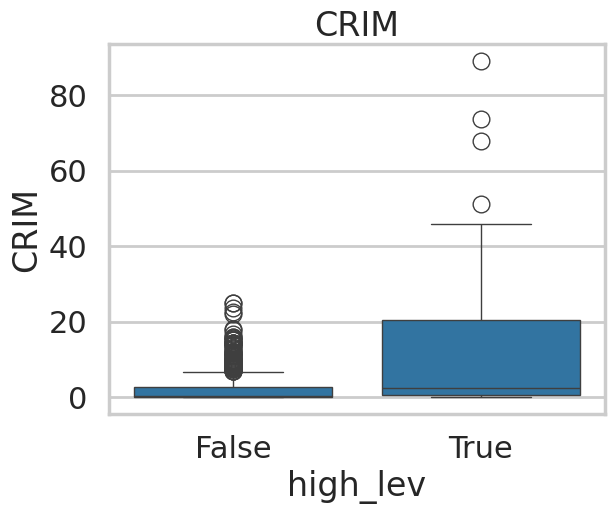

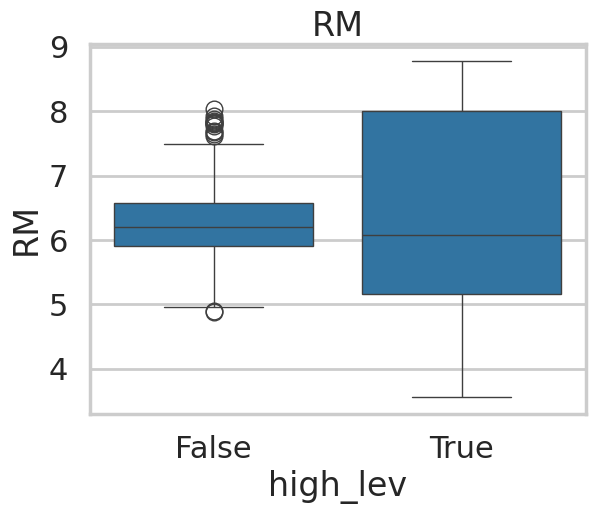

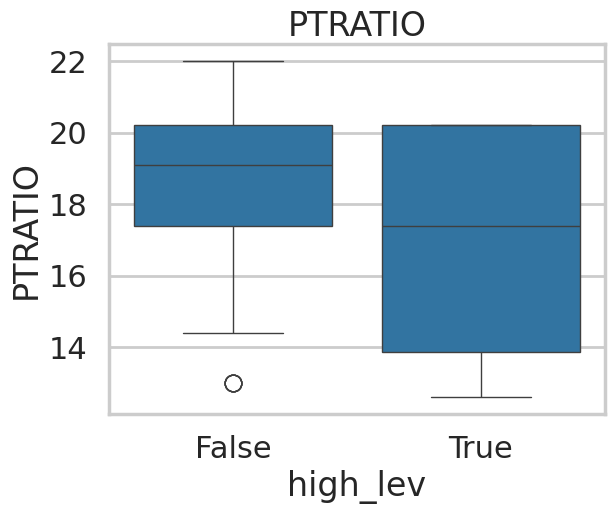

In [86]:
# Boxplots of each independent variable to check for outliers in the high-leverage points
for col in k3cols[:-1]:
    sns.boxplot(data=k3all,x='high_lev',y=col)
    plt.title(col)
    plt.show()

<div style="color:#b68900"> 
Of the high-leverage points, there are four within CRIM that are outliers.  None of the other features have outliers in their high-leverage group.
</div>


In [87]:
# Assess how well each independent variable correlates with leverage; 
# i.e., check if presence of outliers in CRIM correlates with higher leverage
k3all.corr()['leverage'].sort_values(ascending=False)

leverage    1.000000
CRIM        0.766798
high_lev    0.564603
RM          0.023038
PRICE      -0.050335
PTRATIO    -0.050475
Name: leverage, dtype: float64

<div style="color:#b68900"> 
It appears CRIM also correlates most with leverage compared to the other features, which further supports that these four outlier points are a major contributer to the overall high-leverage.  
</div>

<Axes: xlabel='CRIM', ylabel='leverage'>

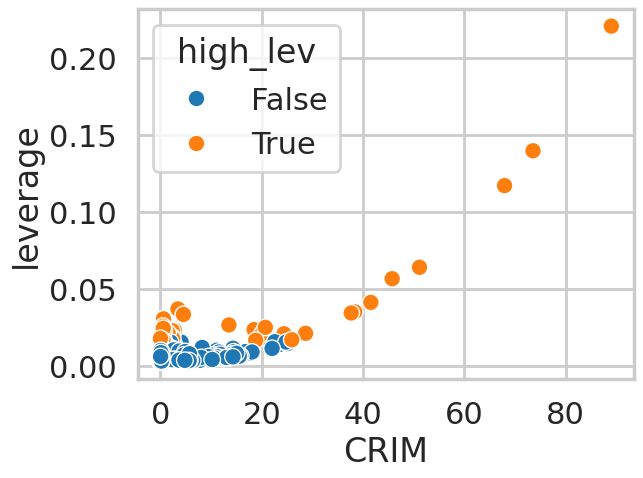

In [88]:
# Scatterplot of overall leverage with respect to the CRIM values
sns.scatterplot(x='CRIM', y='leverage', hue='high_lev', data=k3all)

<div style="color:#b68900"> 
The outliers identified earlier are the four right-most points, which clearly also appear to be exceptionally high in leverage, further confirming the correlation between CRIM and the overall leverage and that these four points are contributing to a significant portion of the overall leverage.
</div>

In [89]:
# Extract these four CRIM-outlier observations from the k3all dataframe
top4CRIM = k3all.sort_values('CRIM', ascending=False).head(4)
top4CRIM

,CRIM,RM,PTRATIO,PRICE,leverage,high_lev
380,88.9762,6.968,20.2,10.4,0.220554,True
418,73.5341,5.957,20.2,8.8,0.139582,True
405,67.9208,5.683,20.2,5.0,0.116949,True
410,51.1358,5.757,20.2,15.0,0.063889,True


In [90]:
# Compare the mean leverage of the top 4 with the rest for a more definitive look
t4c_leverage = top4CRIM['leverage'].mean()
rest_high_lev = k3all[(k3all['high_lev']) & (~k3all.index.isin(top4CRIM.index))]
rest_leverage = rest_high_lev['leverage'].mean()

print(f"Mean Leverage of Top 4 in CRIM\t:\t\t{t4c_leverage}")
print(f"Mean Leverage of other high-lev\t:\t\t{rest_leverage}")
print(f"Mean Leverage Ratio (Top4CRIM/Others):\t\t{t4c_leverage / rest_leverage}")

Mean Leverage of Top 4 in CRIM	:		0.13524314048937935
Mean Leverage of other high-lev	:		0.02275394667904055
Mean Leverage Ratio (Top4CRIM/Others):		5.9437223087965005


<div style="color:#b68900">
    
With an average leverage of ~6 times that of the remaining data points, the four outlier points in CRIM appear to be contributing a disproportionate amount to leverage.

So essentially, the story that potentially explains these high leverage points is likely a similar one to the story outlined earlier for the how CRIM outliers may occur and contribute to overall outliers compared to the other predictor/independent variables.

</div>

<div style="color:#b68900"> 

### 6. Modified Model (Removed High-Leverage Outlier Points)

</div>

<div style="color:#b68900"> 

#### *Original Model (K=3) Summary*

</div>

In [91]:
k3model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           6.15e-98
Time:                        13:42:32   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="color:#b68900"> 

#### A. *Removing points that are both outliers AND high-leverage*

</div>

In [92]:
# Subset only data points with leverage below the high-leverage outliers, thereby removing high-leverage outliers
dfA = k3all[k3all['leverage'] < top4CRIM['leverage'].min()]

# Fit linear model with same k3_formula, but using augmented dataframe k3augdf
aModel = ols(k3_formula,dfA).fit()

# Show summary
aModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     240.2
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           2.28e-96
Time:                        13:42:32   Log-Likelihood:                -1598.9
No. Observations:                 502   AIC:                             3206.
Df Residuals:                     498   BIC:                             3223.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2408      4.038     -0.802      0.423     -11.175       4.694
CRIM          -0.2687      0.047     -5.757      0.000      -0.360      -0.177
RM             7.2781      0.407     17.877      0.000       6.478       8.078
PTRATIO       -1.0329      0.134     -7.698      0.000      -1.297      -0.769
==============================================================================
Omnibus:                      245.144   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2144.064
Skew:                           1.932   Prob(JB):                         0.00
Kurtosis:                      12.358   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="color:#b68900"> 

#### B. *Removing points that are high leverage (but not outliers)*

</div>

In [93]:
# get df with points in which leverage is below the high-leverage threshold (dfB)
dfB = k3all[k3all['leverage'] <= hl_threshold]

# fit model B
bModel = ols(k3_formula,dfB).fit()

# Show summary
bModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     199.6
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           1.14e-82
Time:                        13:42:32   Log-Likelihood:                -1428.1
No. Observations:                 460   AIC:                             2864.
Df Residuals:                     456   BIC:                             2881.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.4914      4.657     -2.897      0.004     -22.643      -4.340
CRIM          -0.4757      0.060     -7.949      0.000      -0.593      -0.358
RM             8.2654      0.496     16.669      0.000       7.291       9.240
PTRATIO       -0.8040      0.144     -5.590      0.000      -1.087      -0.521
==============================================================================
Omnibus:                      304.212   Durbin-Watson:                   0.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4837.572
Skew:                           2.601   Prob(JB):                         0.00
Kurtosis:                      18.011   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="color:#b68900"> 

#### C. *Removing points that are either outliers OR high-leverage*

</div>

In [94]:
# Get df of points that are neither outliers nor high-leverage (dfC)
hlnol = pd.concat([k3_outliers,k3all[k3all['high_lev']]]) # high-leverage & outliers df
print(len(hlnol))
hlnol = hlnol.drop_duplicates()
print(len(hlnol))
indices_C = [ i for i in k3all.index if i not in hlnol.index ]
dfC = k3all.iloc[indices_C,:]

# fit model C (all outliers & high-leverage points removed)
cModel = ols(k3_formula,dfC).fit()
cModel.summary()

67
67


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     402.1
Date:                Sat, 07 Jun 2025   Prob (F-statistic):          1.20e-125
Time:                        13:42:32   Log-Likelihood:                -1214.5
No. Observations:                 444   AIC:                             2437.
Df Residuals:                     440   BIC:                             2453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8210      3.317     -3.262      0.001     -17.341      -4.301
CRIM          -0.5195      0.042    -12.249      0.000      -0.603      -0.436
RM             8.0403      0.359     22.413      0.000       7.335       8.745
PTRATIO       -0.8883      0.101     -8.783      0.000      -1.087      -0.689
==============================================================================
Omnibus:                       10.615   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.970
Skew:                           0.330   Prob(JB):                      0.00415
Kurtosis:                       3.398   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="color:#b68900"> 

#### D. *Removing points that are outliers (but not high-leverage)*

</div>

In [95]:
# Get df of non-outliers (dfD)
dfD = k3nonol

# fit model D
dModel = ols(k3_formula,dfD).fit()
dModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     514.0
Date:                Sat, 07 Jun 2025   Prob (F-statistic):          1.43e-149
Time:                        13:42:32   Log-Likelihood:                -1376.7
No. Observations:                 485   AIC:                             2761.
Df Residuals:                     481   BIC:                             2778.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6623      3.021     -3.199      0.001     -15.597      -3.727
CRIM          -0.2106      0.023     -9.226      0.000      -0.256      -0.166
RM             8.3444      0.309     27.016      0.000       7.737       8.951
PTRATIO       -1.0812      0.096    -11.278      0.000      -1.270      -0.893
==============================================================================
Omnibus:                        1.559   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.433
Skew:                          -0.016   Prob(JB):                        0.489
Kurtosis:                       3.264   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="color:#b68900"> 

#### *Interpretation & Assessment*
The summaries show that removing only the 4 points that were both outliers and high leverage 
appear to have no major effect on the model, even appearing to slightly worsen its performance 
based on R-squared and the F-statistic. The same appears to be true of removing all 46 
high-leverage points; this time, it even seems to be slightly worse than just removing only 4 
points. Removing all outliers and all high-leverage points (62 points total due to overlap 
between the 46 high-leverage and 21 outliers) does seem to improve the model, although simply 
removing the 21 outliers alone seems to perform even better. Referring back to the distinction 
between "academic" vs. "production" environments, this trial-and-error approach may be 
appropriate for production environments.

On the other hand, in a more academic environment, it may be helpful to consider that neither 
being an outlier nor having high leverage alone is sufficient to conclude that a data point has 
a disproportionate influence on the regression model compared to other points (i.e., should be 
removed). If a more formal, systematic approach were desired, one might want to use Cook's 
distance, which takes into account various factors, including leverage and standardized 
residuals, and identifies points beyond a certain threshold for removal. As this is a 
multi-variable function, the threshold would be a contour line beyond which points are 
considered "highly influential." That said, this analysis appears to be beyond the scope of this 
notebook, given its lack of mention in the instructions.

</div>